# 상태 가치 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## 그림 그리는 함수

In [2]:
# V table 그리기    
def show_v_table(v_table, env):    
    for i in range(env.reward.shape[0]):        
        print("+-----------------"*env.reward.shape[1],end="")
        print("+")
        for k in range(3):
            print("|",end="")
            for j in range(env.reward.shape[1]):
                if k==0:
                    print("                 |",end="")
                if k==1:
                        print("   {0:8.2f}      |".format(v_table[i,j]),end="")
                if k==2:
                    print("                 |",end="")
            print()
    print("+-----------------"*env.reward.shape[1],end="")
    print("+")

## Environment 구현

In [3]:
class Environment():
    
    # 1. 미로밖(절벽), 길, 목적지와 보상 설정
    cliff = -3
    road = -1
    goal = 1
    
    # 2. 목적지 좌표 설정
    goal_position = [2,2]
    
    # 3. 보상 리스트 숫자
    reward_list = [[road,road,road],
                   [road,road,road],
                   [road,road,goal]]
    
    # 4. 보상 리스트 문자
    reward_list1 = [["road","road","road"],
                    ["road","road","road"],
                    ["road","road","goal"]]
    
    # 5. 보상 리스트를 array로 설정
    def __init__(self):
        self.reward = np.asarray(self.reward_list)    

    # 6. 선택된 에이전트의 행동 결과 반환 (미로밖일 경우 이전 좌표로 다시 복귀)
    def move(self, agent, action):
        
        done = False
        
        # 6.1 행동에 따른 좌표 구하기
        new_pos = agent.pos + agent.action[action]
        
        # 6.2 현재좌표가 목적지 인지확인
        if self.reward_list1[agent.pos[0]][agent.pos[1]] == "goal":
            reward = self.goal
            observation = agent.set_pos(agent.pos)
            done = True
        # 6.3 이동 후 좌표가 미로 밖인 확인    
        elif new_pos[0] < 0 or new_pos[0] >= self.reward.shape[0] or new_pos[1] < 0 or new_pos[1] >= self.reward.shape[1]:
            reward = self.cliff
            observation = agent.set_pos(agent.pos)
            done = True
        # 6.4 이동 후 좌표가 길이라면
        else:
            observation = agent.set_pos(new_pos)
            reward = self.reward[observation[0],observation[1]]
            
        return observation, reward, done

## Agent 구현

In [4]:
class Agent():
    
    # 1. 행동에 따른 에이전트의 좌표 이동(위, 오른쪽, 아래, 왼쪽) 
    action = np.array([[-1,0],[0,1],[1,0],[0,-1]])
    
    # 2. 각 행동별 선택확률
    select_action_pr = np.array([0.25,0.25,0.25,0.25])
    
    # 3. 에이전트의 초기 위치 저장
    def __init__(self):
        self.pos = (0,0)
    
    # 4. 에이전트의 위치 저장
    def set_pos(self,position):
        self.pos = position
        return self.pos
    
    # 5. 에이전트의 위치 불러오기
    def get_pos(self):
        return self.pos

##상태 가치 함수

In [5]:
# 재귀적으로 상태 가치함수를 계산하는 함수

# 상태 가치 계산
def state_value_function(env,agent,G,max_step,now_step):
    
    # 1. 감가율 설정
    gamma = 0.9
    
# 2. 현재 위치가 도착지점인지 확인
    if env.reward_list1[agent.pos[0]][agent.pos[1]] == "goal":
        return env.goal
    
# 3. 마지막 상태는 보상만 계산
    if (max_step == now_step):
        pos1 = agent.get_pos()
        
        # 3.1 가능한 모든 행동의 보상을 계산
        for i in range(len(agent.action)):
            agent.set_pos(pos1)
            observation, reward, done = env.move(agent,i)
            G += agent.select_action_pr[i] * reward
            
        return G
    
    # 4. 현재 상태의 보상을 계산한 후 다음 step으로 이동
    else:
        
        # 4.1현재 위치 저장
        pos1 = agent.get_pos()
        
        # 4.2 현재 위치에서 가능한 모든 행동을 조사한 후 이동
        for i in range(len(agent.action)):
            observation, reward, done = env.move(agent,i)      
            # 4.2.1 현재 상태에서 보상을 계산
            G += agent.select_action_pr[i] * reward

            # 4.2.2 이동 후 위치 확인 : 미로밖, 벽, 구멍인 경우 이동전 좌표로 다시 이동
            if done == True:
                if observation[0] < 0 or observation[0] >= env.reward.shape[0] or observation[1] < 0 or observation[1] >= env.reward.shape[1]:
                    agent.set_pos(pos1)

            # 4.2.3 다음 step을 계산
            next_v = state_value_function(env, agent, 0, max_step, now_step+1)
            G += agent.select_action_pr[i] * gamma * next_v

            # 4.2.4 현재 위치를 복구
            agent.set_pos(pos1)

        return G

미로의 각 상태의 상태가치를 구하는 코드

max_step_number = 0 total_time = 0.01(s)
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|      -2.00      |      -1.50      |      -2.00      |
|                 |                 |                 |
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|      -1.50      |      -1.00      |      -1.00      |
|                 |                 |                 |
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|      -2.00      |      -1.00      |       1.00      |
|                 |                 |                 |
+-----------------+-----------------+-----------------+
max_step_number = 1 total_time = 0.0(s)
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|      -3.58      |      -2.96      |      -3.46      |
|                 |    

No handles with labels found to put in legend.


max_step_number = 12 total_time = 1873.59(s)
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|     -11.50      |     -10.19      |      -9.89      |
|                 |                 |                 |
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|     -10.19      |      -8.10      |      -6.04      |
|                 |                 |                 |
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|      -9.89      |      -6.04      |       1.00      |
|                 |                 |                 |
+-----------------+-----------------+-----------------+


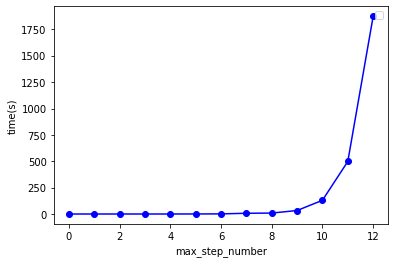

In [6]:
# 1. 환경 초기화
env = Environment()

# 2. 에이전트 초기화
agent = Agent()

# 3. 최대 max_step_number 제한
max_step_number = 13

# 4. 계산 시간 저장을 위한 list
time_len = []

# 5. 재귀함수 state_value_function을를 이용해 각 상태 가치를 계산
for max_step in range(max_step_number):
    
    # 5.1 미로 각 상태의 가치를 테이블 형식으로 저장
    v_table = np.zeros((env.reward.shape[0],env.reward.shape[1]))    
    start_time = time.time()
    
    # 5.2 미로의 각 상태에 대해 state_value_function() 을 이용해 가치를 계산한 후 테이블 형식으로 저장
    for i in range(env.reward.shape[0]):
        for j in range(env.reward.shape[1]):
            agent.set_pos([i,j])
            v_table[i,j] = state_value_function(env,agent, 0, max_step, 0)
            
    # 5.3 max_step에 따른 계산시간 저장
    time_len.append(time.time()-start_time)
    print("max_step_number = {} total_time = {}(s)".format(max_step, np.round(time.time()-start_time,2)))
    
    show_v_table(np.round(v_table,2),env)

# 6. step 별 계산 시간 그래프 그리기    
plt.plot(time_len, 'bo-')
plt.xlabel('max_step_number')
plt.ylabel('time(s)')
plt.legend()
plt.show()